# Data Scientist Nanodegree

## Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 


This notebook walks you through one of the most popular Udacity projects across machine learning and artificial intellegence nanodegree programs.  The goal is to classify images of dogs according to their breed.  

If you are looking for a more guided capstone project related to deep learning and convolutional neural networks, this might be just it.  Notice that even if you follow the notebook to creating your classifier, you must still create a blog post or deploy an application to fulfill the requirements of the capstone project.

Also notice, you may be able to use only parts of this notebook (for example certain coding portions or the data) without completing all parts and still meet all requirements of the capstone project.

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this IPython notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Use a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 6](#step6): Write your Algorithm
* [Step 7](#step7): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

### Import Dog Dataset

In the code cell below, we import a dataset of dog images.  We populate a few variables through the use of the `load_files` function from the scikit-learn library:
- `train_files`, `valid_files`, `test_files` - numpy arrays containing file paths to images
- `train_targets`, `valid_targets`, `test_targets` - numpy arrays containing onehot-encoded classification labels 
- `dog_names` - list of string-valued dog breed names for translating labels

In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# # load train, test, and validation datasets
# train_files, train_targets = load_dataset('../../../data/dog_images/train')
# valid_files, valid_targets = load_dataset('../../../data/dog_images/valid')
# test_files, test_targets = load_dataset('../../../data/dog_images/test')

# load train, test, and validation datasets
train_files, train_targets = load_dataset('dogImages/train')
valid_files, valid_targets = load_dataset('dogImages/valid')
test_files, test_targets = load_dataset('dogImages/test')

# load list of dog names
# dog_names = [item[20:-1] for item in sorted(glob("../../../data/dog_images/train/*/"))]
dog_names = [item[20:-1] for item in sorted(glob('dogImages/train/*/'))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


### Import Human Dataset

In the code cell below, we import a dataset of human images, where the file paths are stored in the numpy array `human_files`.

In [2]:
import random
random.seed(8675309)

# load filenames in shuffled human dataset
# human_files = np.array(glob("../../../data/lfw/*/*"))
human_files = np.array(glob("data/lfw/*/*"))
random.shuffle(human_files)

# print statistics about the dataset
print('There are %d total human images.' % len(human_files))

There are 13233 total human images.


---
<a id='step1'></a>
## Step 1: Detect Humans

We use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.

In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


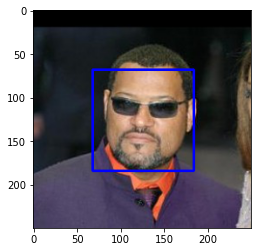

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[3])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

In [5]:
human_files_short = human_files[:100]
dog_files_short = train_files[:100]
# Do NOT modify the code above this line.

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_face_test =[]
for human_im in human_files_short:
    human_face_test.append(face_detector(human_im))

dog_face_test=[]
for dog_im in dog_files_short:
    dog_face_test.append(face_detector(dog_im))

print('Correctly detected human faces:',np.sum(human_face_test))
print('Incorrectly detected dogs as human face are:',np.sum(dog_face_test))

Correctly detected human faces: 99
Incorrectly detected dogs as human face are: 12


__Question 2:__ This algorithmic choice necessitates that we communicate to the user that we accept human images only when they provide a clear view of a face (otherwise, we risk having unneccessarily frustrated users!). In your opinion, is this a reasonable expectation to pose on the user? If not, can you think of a way to detect humans in images that does not necessitate an image with a clearly presented face?

__Answer:__

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on each of the datasets.

In [ ]:
## (Optional) TODO: Report the performance of another  
## face detection algorithm on the LFW dataset
### Feel free to use as many code cells as needed.

# Installing MTCNN face detection model

# !pip install mtcnn

# Using MTCNN  and compare it with opencv
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot

def MTCNN_face_detector(img_path):
    pixels = pyplot.imread(img_path)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    faces = detector.detect_faces(pixels)
    return len(faces) > 0

human_face_test =[]
for human_im in human_files_short:
    human_face_test.append(MTCNN_face_detector(human_im))

dog_face_test=[]
for dog_im in dog_files_short:
    dog_face_test.append(MTCNN_face_detector(dog_im))

print('Correctly detected human faces:',np.sum(human_face_test))
print('Incorrectly detected dogs as human face are:',np.sum(dog_face_test))

MTCNN can detect almost all the human faces in the figures. The number of incorrectly classified dog images as human faces also increased from 11 by opencv to 23 by MTCNN.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a pre-trained [ResNet-50](http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006) model to detect dogs in images.  Our first line of code downloads the ResNet-50 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  Given an image, this pre-trained ResNet-50 model returns a prediction (derived from the available categories in ImageNet) for the object that is contained in the image.

In [6]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

### Pre-process the Data

When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape

$$
(\text{nb_samples}, \text{rows}, \text{columns}, \text{channels}),
$$

where `nb_samples` corresponds to the total number of images (or samples), and `rows`, `columns`, and `channels` correspond to the number of rows, columns, and channels for each image, respectively.  

The `path_to_tensor` function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN.  The function first loads the image and resizes it to a square image that is $224 \times 224$ pixels.  Next, the image is converted to an array, which is then resized to a 4D tensor.  In this case, since we are working with color images, each image has three channels.  Likewise, since we are processing a single image (or sample), the returned tensor will always have shape

$$
(1, 224, 224, 3).
$$

The `paths_to_tensor` function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape 

$$
(\text{nb_samples}, 224, 224, 3).
$$

Here, `nb_samples` is the number of samples, or number of images, in the supplied array of image paths.  It is best to think of `nb_samples` as the number of 3D tensors (where each 3D tensor corresponds to a different image) in your dataset!

In [8]:
from tensorflow.keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

### Making Predictions with ResNet-50

Getting the 4D tensor ready for ResNet-50, and for any other pre-trained model in Keras, requires some additional processing.  First, the RGB image is converted to BGR by reordering the channels.  All pre-trained models have the additional normalization step that the mean pixel (expressed in RGB as $[103.939, 116.779, 123.68]$ and calculated from all pixels in all images in ImageNet) must be subtracted from every pixel in each image.  This is implemented in the imported function `preprocess_input`.  If you're curious, you can check the code for `preprocess_input` [here](https://github.com/fchollet/keras/blob/master/keras/applications/imagenet_utils.py).

Now that we have a way to format our image for supplying to ResNet-50, we are now ready to use the model to extract the predictions.  This is accomplished with the `predict` method, which returns an array whose $i$-th entry is the model's predicted probability that the image belongs to the $i$-th ImageNet category.  This is implemented in the `ResNet50_predict_labels` function below.

By taking the argmax of the predicted probability vector, we obtain an integer corresponding to the model's predicted object class, which we can identify with an object category through the use of this [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a). 

In [9]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

### Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained ResNet-50 model, we need only check if the `ResNet50_predict_labels` function above returns a value between 151 and 268 (inclusive).

We use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [10]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151)) 

### (IMPLEMENTATION) Assess the Dog Detector

__Question 3:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

In [11]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_face_test =[]
for human_im in human_files_short:
    human_face_test.append(dog_detector(human_im))

dog_face_test=[]
for dog_im in dog_files_short:
    dog_face_test.append(dog_detector(dog_im))

print('Percentage (number) of incorrectly classified humans as dogs:',np.sum(human_face_test),'%')
print('Percentage (number) of correctly classified dogs:',np.sum(dog_face_test),'%')

Percentage (number) of incorrectly classified humans as dogs: 0 %
Percentage (number) of correctly classified dogs: 100 %


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 1%.  In Step 5 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

Be careful with adding too many trainable layers!  More parameters means longer training, which means you are more likely to need a GPU to accelerate the training process.  Thankfully, Keras provides a handy estimate of the time that each epoch is likely to take; you can extrapolate this estimate to figure out how long it will take for your algorithm to train. 

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have great difficulty in distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun! 

### Pre-process the Data

We rescale the images by dividing every pixel in every image by 255.

In [12]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|████████████████████████████████████████████████████████████████████████████████| 836/836 [00:17<00:00, 48.55it/s]


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        model.summary()

We have imported some Python modules to get you started, but feel free to import as many modules as you need.  If you end up getting stuck, here's a hint that specifies a model that trains relatively fast on CPU and attains >1% test accuracy in 5 epochs:

![Sample CNN](images/sample_cnn.png)
           
__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  If you chose to use the hinted architecture above, describe why you think that CNN architecture should work well for the image classification task.

__Answer:__ 

###  Importing requred libraries

In [13]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense, Lambda
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint 

In [14]:
# Sequential convlutional network
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(133, activation='softmax'))


### TODO: Define your architecture.

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      832       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      16448     
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       3

### Compile the Model

In [15]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [16]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16985669073004500981
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2021507072
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17447443005238742203
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 970M, pci bus id: 0000:01:00.0, compute capability: 5.2"
]


In [17]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 100

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch_100epoch_2dense.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Epoch 1/100
334/334 [==============================] - 57s 161ms/step - loss: 6.7375 - accuracy: 0.0091 - val_loss: 4.8928 - val_accuracy: 0.0096

Epoch 00001: val_loss improved from inf to 4.89283, saving model to saved_models\weights.best.from_scratch_100epoch_2dense.hdf5
Epoch 2/100
334/334 [==============================] - 53s 160ms/step - loss: 4.9644 - accuracy: 0.0106 - val_loss: 4.8800 - val_accuracy: 0.0108

Epoch 00002: val_loss improved from 4.89283 to 4.88001, saving model to saved_models\weights.best.from_scratch_100epoch_2dense.hdf5
Epoch 3/100
334/334 [==============================] - 53s 159ms/step - loss: 4.9153 - accuracy: 0.0115 - val_loss: 4.8762 - val_accuracy: 0.0108

Epoch 00003: val_loss improved from 4.88001 to 4.87617, saving model to saved_models\weights.best.from_scratch_100epoch_2dense.hdf5
Epoch 4/100
334/334 [==============================] - 53s 158ms/step - loss: 4.9071 - accuracy: 0.0109 - val_loss: 4.8735 - val_accuracy: 0.0108

Epoch 00004: val_los

KeyboardInterrupt: 

### Load the Model with the Best Validation Loss

In [21]:
model.load_weights('saved_models/weights.best.from_scratch_100epoch_2dense.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [17]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy after 5 epochs: %.4f%%' % test_accuracy)

Test accuracy after 5 epochs: 1.0766%


### Model with batch normalization and more convlutional layers

In [16]:
bt_model = Sequential()
bt_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(224, 224, 3)))
bt_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
bt_model.add(BatchNormalization())
bt_model.add(MaxPooling2D(pool_size=2))

bt_model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
bt_model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
bt_model.add(BatchNormalization())
bt_model.add(MaxPooling2D(pool_size=2))

bt_model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
bt_model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
bt_model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
bt_model.add(BatchNormalization())
bt_model.add(MaxPooling2D(pool_size=2))

bt_model.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
bt_model.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
bt_model.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
bt_model.add(BatchNormalization())
bt_model.add(MaxPooling2D(pool_size=2))

bt_model.add(Dropout(0.3))
bt_model.add(Flatten())
bt_model.add(Dense(512, activation='relu'))
bt_model.add(Dropout(0.4))
bt_model.add(Dense(256, activation='relu'))
bt_model.add(Dropout(0.3))
bt_model.add(Dense(133, activation='softmax'))

bt_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 50

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.batchnormalization_50epoch_multiconv.hdf5', 
                               verbose=1, save_best_only=True)

history = bt_model.fit(train_tensors, train_targets, 
                  validation_data=(valid_tensors, valid_targets),
                  epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)


Epoch 1/10


ResourceExhaustedError:  OOM when allocating tensor with shape[20,64,225,225] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node sequential_1/conv2d_11/Relu (defined at <ipython-input-16-4e72469ff2b8>:41) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_20785]

Function call stack:
train_function


In [32]:
model.load_weights('saved_models/weights.best.batchnormalization_50epoch_multiconv.hdf5')
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy after 50 epochs: %.4f%%' % test_accuracy)

Test accuracy after 10 epochs: 1.5550%


### Try 4
Removing BatchNormalization

In [13]:
# from keras.preprocessing.image import ImageDataGenerator

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(133, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      16448     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     32896     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     65664     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)      

In [14]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 2

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch_10epoch_multiconv_try4.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/2


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\kerasgpu\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-4356b5a256a7>", line 10, in <module>
    epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)
  File "C:\ProgramData\Anaconda3\envs\kerasgpu\lib\site-packages\keras\engine\training.py", line 1239, in fit
    validation_freq=validation_freq)
  File "C:\ProgramData\Anaconda3\envs\kerasgpu\lib\site-packages\keras\engine\training_arrays.py", line 196, in fit_loop
    outs = fit_function(ins_batch)
  File "C:\ProgramData\Anaconda3\envs\kerasgpu\lib\site-packages\tensorflow_core\python\keras\backend.py", line 3727, in __call__
    outputs = self._graph_fn(*converted_inputs)
  File "C:\ProgramData\Anaconda3\envs\kerasgpu\lib\site-packages\tensorflow_core\python\eager\function.py", line 1551, in __call__
    return self._call_impl(args, kwargs)
 

---
<a id='step4'></a>
## Step 4: Use a CNN to Classify Dog Breeds

To reduce training time without sacrificing accuracy, we show you how to train a CNN using transfer learning.  In the following step, you will get a chance to use transfer learning to train your own CNN.

### Obtain Bottleneck Features

In [24]:
bottleneck_features = np.load('bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

ERROR! Session/line number was not unique in database. History logging moved to new session 78


### Model Architecture

The model uses the the pre-trained VGG-16 model as a fixed feature extractor, where the last convolutional output of VGG-16 is fed as input to our model.  We only add a global average pooling layer and a fully connected layer, where the latter contains one node for each dog category and is equipped with a softmax.

In [25]:
# VGG16_model = Sequential()
# VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
# VGG16_model.add(Dense(133, activation='softmax'))

# VGG16_model.summary()

In [28]:
VGG16_model = Sequential()


VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(512, activation='relu', use_bias=True,))
VGG16_model.add(Dropout(0.4))
VGG16_model.add(Dense(256, activation='relu',use_bias=True,))
VGG16_model.add(Dropout(0.3))
VGG16_model.add(Dense(133, activation='softmax'))


VGG16_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 133)               34181     
Total params: 13,011,077
Trainable params: 13,011,077
Non-trainable params: 0
__________________________________________

### Compile the Model

In [29]:
# VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
VGG16_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train the Model

In [35]:
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=200, batch_size=20, callbacks=[checkpointer], verbose=1)

Epoch 1/200
334/334 [==============================] - 2s 6ms/step - loss: 4.5148 - accuracy: 0.1470 - val_loss: 2.2409 - val_accuracy: 0.4587

Epoch 00001: val_loss improved from inf to 2.24087, saving model to saved_models\weights.best.VGG16.hdf5
Epoch 2/200
334/334 [==============================] - 2s 5ms/step - loss: 2.3724 - accuracy: 0.3897 - val_loss: 1.4481 - val_accuracy: 0.6132

Epoch 00002: val_loss improved from 2.24087 to 1.44811, saving model to saved_models\weights.best.VGG16.hdf5
Epoch 3/200
334/334 [==============================] - 2s 5ms/step - loss: 1.7982 - accuracy: 0.5039 - val_loss: 1.1403 - val_accuracy: 0.6707

Epoch 00003: val_loss improved from 1.44811 to 1.14027, saving model to saved_models\weights.best.VGG16.hdf5
Epoch 4/200
334/334 [==============================] - 2s 5ms/step - loss: 1.5151 - accuracy: 0.5707 - val_loss: 0.9984 - val_accuracy: 0.7006

Epoch 00004: val_loss improved from 1.14027 to 0.99838, saving model to saved_models\weights.best.VGG

334/334 [==============================] - 1s 4ms/step - loss: 0.5116 - accuracy: 0.8829 - val_loss: 1.1994 - val_accuracy: 0.7533

Epoch 00082: val_loss did not improve from 0.82553
Epoch 83/200
334/334 [==============================] - 1s 4ms/step - loss: 0.5476 - accuracy: 0.8772 - val_loss: 1.2001 - val_accuracy: 0.7617

Epoch 00083: val_loss did not improve from 0.82553
Epoch 84/200
334/334 [==============================] - 2s 6ms/step - loss: 0.6480 - accuracy: 0.8618 - val_loss: 1.1634 - val_accuracy: 0.7677

Epoch 00084: val_loss did not improve from 0.82553
Epoch 85/200
334/334 [==============================] - 1s 4ms/step - loss: 0.5557 - accuracy: 0.8753 - val_loss: 1.1419 - val_accuracy: 0.7713

Epoch 00085: val_loss did not improve from 0.82553
Epoch 86/200
334/334 [==============================] - 1s 4ms/step - loss: 0.5017 - accuracy: 0.8822 - val_loss: 1.3510 - val_accuracy: 0.7653

Epoch 00086: val_loss did not improve from 0.82553
Epoch 87/200
334/334 [===========

334/334 [==============================] - 1s 4ms/step - loss: 0.5123 - accuracy: 0.8930 - val_loss: 1.4903 - val_accuracy: 0.7593

Epoch 00124: val_loss did not improve from 0.82553
Epoch 125/200
334/334 [==============================] - 2s 5ms/step - loss: 0.4693 - accuracy: 0.8952 - val_loss: 1.4082 - val_accuracy: 0.7749

Epoch 00125: val_loss did not improve from 0.82553
Epoch 126/200
334/334 [==============================] - 2s 5ms/step - loss: 0.4470 - accuracy: 0.8991 - val_loss: 1.4171 - val_accuracy: 0.7844

Epoch 00126: val_loss did not improve from 0.82553
Epoch 127/200
334/334 [==============================] - 2s 5ms/step - loss: 0.5252 - accuracy: 0.8921 - val_loss: 1.3570 - val_accuracy: 0.7725

Epoch 00127: val_loss did not improve from 0.82553
Epoch 128/200
334/334 [==============================] - 2s 5ms/step - loss: 0.5557 - accuracy: 0.8924 - val_loss: 1.5063 - val_accuracy: 0.7653

Epoch 00128: val_loss did not improve from 0.82553
Epoch 129/200
334/334 [======


Epoch 00165: val_loss did not improve from 0.82553
Epoch 166/200
334/334 [==============================] - 1s 4ms/step - loss: 0.5483 - accuracy: 0.9025 - val_loss: 1.6970 - val_accuracy: 0.7677

Epoch 00166: val_loss did not improve from 0.82553
Epoch 167/200
334/334 [==============================] - 1s 4ms/step - loss: 0.5325 - accuracy: 0.8999 - val_loss: 1.6655 - val_accuracy: 0.7569

Epoch 00167: val_loss did not improve from 0.82553
Epoch 168/200
334/334 [==============================] - 1s 4ms/step - loss: 0.5139 - accuracy: 0.9025 - val_loss: 1.7199 - val_accuracy: 0.7569

Epoch 00168: val_loss did not improve from 0.82553
Epoch 169/200
334/334 [==============================] - 1s 4ms/step - loss: 0.5136 - accuracy: 0.9033 - val_loss: 1.7293 - val_accuracy: 0.7749

Epoch 00169: val_loss did not improve from 0.82553
Epoch 170/200
334/334 [==============================] - 1s 4ms/step - loss: 0.5074 - accuracy: 0.9072 - val_loss: 1.9525 - val_accuracy: 0.7617

Epoch 00170: v

### Load the Model with the Best Validation Loss

In [36]:
VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

### Test the Model

Now, we can use the CNN to test how well it identifies breed within our test dataset of dog images.  We print the test accuracy below.

In [37]:
# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 73.2057%


### Predict Dog Breed with the Model

In [24]:
from extract_bottleneck_features import *

def VGG16_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

---
<a id='step5'></a>
## Step 5: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

In Step 4, we used transfer learning to create a CNN using VGG-16 bottleneck features.  In this section, you must use the bottleneck features from a different pre-trained model.  To make things easier for you, we have pre-computed the features for all of the networks that are currently available in Keras:
- [VGG-19](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG19Data.npz) bottleneck features
- [ResNet-50](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogResnet50Data.npz) bottleneck features
- [Inception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogInceptionV3Data.npz) bottleneck features
- [Xception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz) bottleneck features

The files are encoded as such:

    Dog{network}Data.npz
    
where `{network}`, in the above filename, can be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.  Pick one of the above architectures, download the corresponding bottleneck features, and store the downloaded file in the `bottleneck_features/` folder in the repository.

### (IMPLEMENTATION) Obtain Bottleneck Features

In the code block below, extract the bottleneck features corresponding to the train, test, and validation sets by running the following:

    bottleneck_features = np.load('bottleneck_features/Dog{network}Data.npz')
    train_{network} = bottleneck_features['train']
    valid_{network} = bottleneck_features['valid']
    test_{network} = bottleneck_features['test']

### Resnet50 biottleneck

In [41]:
### TODO: Obtain bottleneck features from another pre-trained CNN.
bottleneck_features = np.load('bottleneck_features/DogResnet50Data.npz')
train_Resnet50 = bottleneck_features['train']
valid_Resnet50 = bottleneck_features['valid']
test_Resnet50 = bottleneck_features['test']

In [42]:
# add 1 
Resnet50_model = Sequential()

Resnet50_model.add(GlobalAveragePooling2D(input_shape=train_Resnet50.shape[1:]))
Resnet50_model.add(Dense(512, activation='relu'))
Resnet50_model.add(Dropout(0.4))
Resnet50_model.add(Dense(256, activation='relu'))
Resnet50_model.add(Dropout(0.3))
Resnet50_model.add(Dense(133, activation='softmax'))

Resnet50_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 133)               34181     
Total params: 428,165
Trainable params: 428,165
Non-trainable params: 0
________________________________________________

In [51]:
# VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
Resnet50_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.Resnet50.hdf5', 
                               verbose=1, save_best_only=True)

history =Resnet50_model.fit(train_Resnet50, train_targets, 
          validation_data=(valid_Resnet50, valid_targets),
          epochs=100, batch_size=20, callbacks=[checkpointer], verbose=1)

Epoch 1/100
334/334 [==============================] - 2s 4ms/step - loss: 0.2525 - accuracy: 0.9499 - val_loss: 1.4331 - val_accuracy: 0.8168

Epoch 00001: val_loss improved from inf to 1.43309, saving model to saved_models\weights.best.Resnet50.hdf5
Epoch 2/100
334/334 [==============================] - 1s 4ms/step - loss: 0.2700 - accuracy: 0.9445 - val_loss: 1.4575 - val_accuracy: 0.8084

Epoch 00002: val_loss did not improve from 1.43309
Epoch 3/100
334/334 [==============================] - 1s 4ms/step - loss: 0.2652 - accuracy: 0.9467 - val_loss: 1.3934 - val_accuracy: 0.8216

Epoch 00003: val_loss improved from 1.43309 to 1.39344, saving model to saved_models\weights.best.Resnet50.hdf5
Epoch 4/100
334/334 [==============================] - 1s 4ms/step - loss: 0.2611 - accuracy: 0.9503 - val_loss: 1.4486 - val_accuracy: 0.8168

Epoch 00004: val_loss did not improve from 1.39344
Epoch 5/100
334/334 [==============================] - 1s 4ms/step - loss: 0.3296 - accuracy: 0.9388 -


Epoch 00041: val_loss did not improve from 1.23648
Epoch 42/100
334/334 [==============================] - 1s 4ms/step - loss: 0.2846 - accuracy: 0.9445 - val_loss: 1.2923 - val_accuracy: 0.8156

Epoch 00042: val_loss did not improve from 1.23648
Epoch 43/100
334/334 [==============================] - 1s 4ms/step - loss: 0.2604 - accuracy: 0.9494 - val_loss: 1.4970 - val_accuracy: 0.8240

Epoch 00043: val_loss did not improve from 1.23648
Epoch 44/100
334/334 [==============================] - 1s 3ms/step - loss: 0.2506 - accuracy: 0.9519 - val_loss: 1.5984 - val_accuracy: 0.8156

Epoch 00044: val_loss did not improve from 1.23648
Epoch 45/100
334/334 [==============================] - 1s 3ms/step - loss: 0.2551 - accuracy: 0.9524 - val_loss: 1.3884 - val_accuracy: 0.8323

Epoch 00045: val_loss did not improve from 1.23648
Epoch 46/100
334/334 [==============================] - 1s 3ms/step - loss: 0.2510 - accuracy: 0.9500 - val_loss: 1.5129 - val_accuracy: 0.8180

Epoch 00046: val_lo


Epoch 00083: val_loss did not improve from 1.23648
Epoch 84/100
334/334 [==============================] - 1s 4ms/step - loss: 0.2714 - accuracy: 0.9551 - val_loss: 1.8694 - val_accuracy: 0.7940

Epoch 00084: val_loss did not improve from 1.23648
Epoch 85/100
334/334 [==============================] - 1s 4ms/step - loss: 0.2859 - accuracy: 0.9552 - val_loss: 1.8896 - val_accuracy: 0.8000

Epoch 00085: val_loss did not improve from 1.23648
Epoch 86/100
334/334 [==============================] - 1s 4ms/step - loss: 0.2955 - accuracy: 0.9548 - val_loss: 1.8061 - val_accuracy: 0.7892

Epoch 00086: val_loss did not improve from 1.23648
Epoch 87/100
334/334 [==============================] - 1s 4ms/step - loss: 0.2618 - accuracy: 0.9539 - val_loss: 1.7446 - val_accuracy: 0.8096

Epoch 00087: val_loss did not improve from 1.23648
Epoch 88/100
334/334 [==============================] - 1s 3ms/step - loss: 0.2700 - accuracy: 0.9542 - val_loss: 1.7200 - val_accuracy: 0.8168

Epoch 00088: val_lo

In [52]:
# get index of predicted dog breed for each image in test set
Resnet50_predictions = [np.argmax(Resnet50_model.predict(np.expand_dims(feature, axis=0))) for feature in test_Resnet50]

# report test accuracy
test_accuracy = 100*np.sum(np.array(Resnet50_predictions)==np.argmax(test_targets, axis=1))/len(Resnet50_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 80.3828%


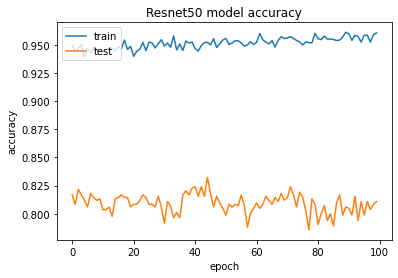

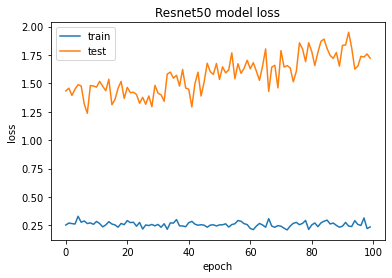

In [53]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Resnet50 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Resnet50 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
Resnet50_model.history

### Inception  V3 bottleneck

In [68]:
### TODO: Obtain bottleneck features from another pre-trained CNN.
bottleneck_features = np.load('bottleneck_features/DogInceptionV3Data.npz')
train_Inception = bottleneck_features['train']
valid_Inception = bottleneck_features['valid']
test_Inception = bottleneck_features['test']

# Define sequential CNN and it's output layers
Inception_model = Sequential()

Inception_model.add(GlobalAveragePooling2D(input_shape=train_Inception.shape[1:]))
Inception_model.add(Dense(512, activation='relu'))
Inception_model.add(Dropout(0.4))
Inception_model.add(Dense(256, activation='relu'))
Inception_model.add(Dropout(0.3))
Inception_model.add(Dense(133, activation='softmax'))

Inception_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_8 ( (None, 2048)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 133)               34181     
Total params: 1,214,597
Trainable params: 1,214,597
Non-trainable params: 0
___________________________________________

In [69]:
Inception_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.InceptionV3_3dense_1000epochs.hdf5', 
                               verbose=1, save_best_only=True)

history =Inception_model.fit(train_Inception, train_targets, 
          validation_data=(valid_Inception, valid_targets),
          epochs=1000, batch_size=20, callbacks=[checkpointer], verbose=1)

Epoch 1/1000
334/334 [==============================] - 2s 6ms/step - loss: 2.4264 - accuracy: 0.4458 - val_loss: 0.8515 - val_accuracy: 0.7521

Epoch 00001: val_loss improved from inf to 0.85147, saving model to saved_models\weights.best.InceptionV3_3dense_1000epochs.hdf5
Epoch 2/1000
334/334 [==============================] - 2s 6ms/step - loss: 1.1445 - accuracy: 0.6783 - val_loss: 0.7246 - val_accuracy: 0.7784

Epoch 00002: val_loss improved from 0.85147 to 0.72464, saving model to saved_models\weights.best.InceptionV3_3dense_1000epochs.hdf5
Epoch 3/1000
334/334 [==============================] - 2s 6ms/step - loss: 0.9588 - accuracy: 0.7217 - val_loss: 0.6736 - val_accuracy: 0.8036

Epoch 00003: val_loss improved from 0.72464 to 0.67361, saving model to saved_models\weights.best.InceptionV3_3dense_1000epochs.hdf5
Epoch 4/1000
334/334 [==============================] - 2s 6ms/step - loss: 0.8275 - accuracy: 0.7542 - val_loss: 0.6329 - val_accuracy: 0.8156

Epoch 00004: val_loss imp


Epoch 00081: val_loss did not improve from 0.61652
Epoch 82/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.2503 - accuracy: 0.9370 - val_loss: 1.1303 - val_accuracy: 0.8455

Epoch 00082: val_loss did not improve from 0.61652
Epoch 83/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.2521 - accuracy: 0.9419 - val_loss: 0.9835 - val_accuracy: 0.8443

Epoch 00083: val_loss did not improve from 0.61652
Epoch 84/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.2228 - accuracy: 0.9415 - val_loss: 1.0568 - val_accuracy: 0.8479

Epoch 00084: val_loss did not improve from 0.61652
Epoch 85/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.2684 - accuracy: 0.9400 - val_loss: 1.1833 - val_accuracy: 0.8263

Epoch 00085: val_loss did not improve from 0.61652
Epoch 86/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.2782 - accuracy: 0.9343 - val_loss: 1.1904 - val_accuracy: 0.8371

Epoch 00086: v

334/334 [==============================] - 2s 5ms/step - loss: 0.2397 - accuracy: 0.9564 - val_loss: 1.7189 - val_accuracy: 0.8455

Epoch 00164: val_loss did not improve from 0.61652
Epoch 165/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.2146 - accuracy: 0.9615 - val_loss: 1.5274 - val_accuracy: 0.8587

Epoch 00165: val_loss did not improve from 0.61652
Epoch 166/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.2523 - accuracy: 0.9537 - val_loss: 1.6854 - val_accuracy: 0.8359

Epoch 00166: val_loss did not improve from 0.61652
Epoch 167/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.2489 - accuracy: 0.9545 - val_loss: 1.7046 - val_accuracy: 0.8347

Epoch 00167: val_loss did not improve from 0.61652
Epoch 168/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.1997 - accuracy: 0.9602 - val_loss: 1.7126 - val_accuracy: 0.8395

Epoch 00168: val_loss did not improve from 0.61652
Epoch 169/1000
334/334 [=

334/334 [==============================] - 2s 6ms/step - loss: 0.2731 - accuracy: 0.9596 - val_loss: 2.3052 - val_accuracy: 0.8491

Epoch 00246: val_loss did not improve from 0.61652
Epoch 247/1000
334/334 [==============================] - 2s 7ms/step - loss: 0.2102 - accuracy: 0.9626 - val_loss: 2.2790 - val_accuracy: 0.8443

Epoch 00247: val_loss did not improve from 0.61652
Epoch 248/1000
334/334 [==============================] - 2s 6ms/step - loss: 0.2483 - accuracy: 0.9563 - val_loss: 2.3403 - val_accuracy: 0.8527

Epoch 00248: val_loss did not improve from 0.61652
Epoch 249/1000
334/334 [==============================] - 2s 6ms/step - loss: 0.2212 - accuracy: 0.9641 - val_loss: 2.1484 - val_accuracy: 0.8491

Epoch 00249: val_loss did not improve from 0.61652
Epoch 250/1000
334/334 [==============================] - 2s 6ms/step - loss: 0.2697 - accuracy: 0.9608 - val_loss: 2.4259 - val_accuracy: 0.8347

Epoch 00250: val_loss did not improve from 0.61652
Epoch 251/1000
334/334 [=

334/334 [==============================] - 2s 5ms/step - loss: 0.2265 - accuracy: 0.9648 - val_loss: 2.5329 - val_accuracy: 0.8563

Epoch 00328: val_loss did not improve from 0.61652
Epoch 329/1000
334/334 [==============================] - 2s 6ms/step - loss: 0.2253 - accuracy: 0.9678 - val_loss: 2.5040 - val_accuracy: 0.8551

Epoch 00329: val_loss did not improve from 0.61652
Epoch 330/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.2709 - accuracy: 0.9668 - val_loss: 2.8277 - val_accuracy: 0.8563

Epoch 00330: val_loss did not improve from 0.61652
Epoch 331/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.2179 - accuracy: 0.9701 - val_loss: 2.7886 - val_accuracy: 0.8539

Epoch 00331: val_loss did not improve from 0.61652
Epoch 332/1000
334/334 [==============================] - 2s 6ms/step - loss: 0.1854 - accuracy: 0.9751 - val_loss: 2.7333 - val_accuracy: 0.8587

Epoch 00332: val_loss did not improve from 0.61652
Epoch 333/1000
334/334 [=

334/334 [==============================] - 2s 6ms/step - loss: 0.2823 - accuracy: 0.9711 - val_loss: 3.6395 - val_accuracy: 0.8479

Epoch 00410: val_loss did not improve from 0.61652
Epoch 411/1000
334/334 [==============================] - 2s 6ms/step - loss: 0.2377 - accuracy: 0.9705 - val_loss: 3.2958 - val_accuracy: 0.8551

Epoch 00411: val_loss did not improve from 0.61652
Epoch 412/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.2494 - accuracy: 0.9714 - val_loss: 2.9159 - val_accuracy: 0.8539

Epoch 00412: val_loss did not improve from 0.61652
Epoch 413/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.2476 - accuracy: 0.9710 - val_loss: 2.8737 - val_accuracy: 0.8563

Epoch 00413: val_loss did not improve from 0.61652
Epoch 414/1000
334/334 [==============================] - 2s 6ms/step - loss: 0.2133 - accuracy: 0.9717 - val_loss: 3.3999 - val_accuracy: 0.8611

Epoch 00414: val_loss did not improve from 0.61652
Epoch 415/1000
334/334 [=

334/334 [==============================] - 2s 5ms/step - loss: 0.2140 - accuracy: 0.9720 - val_loss: 3.1815 - val_accuracy: 0.8563

Epoch 00492: val_loss did not improve from 0.61652
Epoch 493/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.3379 - accuracy: 0.9702 - val_loss: 3.2807 - val_accuracy: 0.8611

Epoch 00493: val_loss did not improve from 0.61652
Epoch 494/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.2589 - accuracy: 0.9738 - val_loss: 3.6561 - val_accuracy: 0.8515

Epoch 00494: val_loss did not improve from 0.61652
Epoch 495/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.1999 - accuracy: 0.9746 - val_loss: 4.0013 - val_accuracy: 0.8599

Epoch 00495: val_loss did not improve from 0.61652
Epoch 496/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.2557 - accuracy: 0.9710 - val_loss: 4.1982 - val_accuracy: 0.8503

Epoch 00496: val_loss did not improve from 0.61652
Epoch 497/1000
334/334 [=

334/334 [==============================] - 2s 5ms/step - loss: 0.2633 - accuracy: 0.9741 - val_loss: 4.2175 - val_accuracy: 0.8587

Epoch 00574: val_loss did not improve from 0.61652
Epoch 575/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.2096 - accuracy: 0.9768 - val_loss: 4.0177 - val_accuracy: 0.8491

Epoch 00575: val_loss did not improve from 0.61652
Epoch 576/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.2079 - accuracy: 0.9734 - val_loss: 3.9394 - val_accuracy: 0.8491

Epoch 00576: val_loss did not improve from 0.61652
Epoch 577/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.2434 - accuracy: 0.9735 - val_loss: 4.0623 - val_accuracy: 0.8407

Epoch 00577: val_loss did not improve from 0.61652
Epoch 578/1000
334/334 [==============================] - 2s 6ms/step - loss: 0.2034 - accuracy: 0.9762 - val_loss: 4.0931 - val_accuracy: 0.8611

Epoch 00578: val_loss did not improve from 0.61652
Epoch 579/1000
334/334 [=

334/334 [==============================] - 2s 5ms/step - loss: 0.2344 - accuracy: 0.9732 - val_loss: 4.2015 - val_accuracy: 0.8455

Epoch 00656: val_loss did not improve from 0.61652
Epoch 657/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.2309 - accuracy: 0.9753 - val_loss: 4.4358 - val_accuracy: 0.8479

Epoch 00657: val_loss did not improve from 0.61652
Epoch 658/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.2124 - accuracy: 0.9793 - val_loss: 3.5845 - val_accuracy: 0.8515

Epoch 00658: val_loss did not improve from 0.61652
Epoch 659/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.1647 - accuracy: 0.9805 - val_loss: 3.9631 - val_accuracy: 0.8515

Epoch 00659: val_loss did not improve from 0.61652
Epoch 660/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.2248 - accuracy: 0.9799 - val_loss: 4.1475 - val_accuracy: 0.8515

Epoch 00660: val_loss did not improve from 0.61652
Epoch 661/1000
334/334 [=

334/334 [==============================] - 2s 5ms/step - loss: 0.2254 - accuracy: 0.9772 - val_loss: 4.8776 - val_accuracy: 0.8599

Epoch 00738: val_loss did not improve from 0.61652
Epoch 739/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.3014 - accuracy: 0.9735 - val_loss: 4.8561 - val_accuracy: 0.8587

Epoch 00739: val_loss did not improve from 0.61652
Epoch 740/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.2040 - accuracy: 0.9796 - val_loss: 4.9589 - val_accuracy: 0.8587

Epoch 00740: val_loss did not improve from 0.61652
Epoch 741/1000
334/334 [==============================] - 2s 6ms/step - loss: 0.2614 - accuracy: 0.9772 - val_loss: 3.8822 - val_accuracy: 0.8515

Epoch 00741: val_loss did not improve from 0.61652
Epoch 742/1000
334/334 [==============================] - 2s 6ms/step - loss: 0.2427 - accuracy: 0.9750 - val_loss: 4.5883 - val_accuracy: 0.8467

Epoch 00742: val_loss did not improve from 0.61652
Epoch 743/1000
334/334 [=

334/334 [==============================] - 7s 20ms/step - loss: 0.2124 - accuracy: 0.9799 - val_loss: 5.3038 - val_accuracy: 0.8455

Epoch 00820: val_loss did not improve from 0.61652
Epoch 821/1000
334/334 [==============================] - 3s 10ms/step - loss: 0.1667 - accuracy: 0.9799 - val_loss: 5.3145 - val_accuracy: 0.8623

Epoch 00821: val_loss did not improve from 0.61652
Epoch 822/1000
334/334 [==============================] - 4s 12ms/step - loss: 0.2079 - accuracy: 0.9801 - val_loss: 6.3000 - val_accuracy: 0.8479

Epoch 00822: val_loss did not improve from 0.61652
Epoch 823/1000
334/334 [==============================] - 4s 11ms/step - loss: 0.2023 - accuracy: 0.9822 - val_loss: 5.9496 - val_accuracy: 0.8491

Epoch 00823: val_loss did not improve from 0.61652
Epoch 824/1000
334/334 [==============================] - 3s 9ms/step - loss: 0.1754 - accuracy: 0.9808 - val_loss: 5.0106 - val_accuracy: 0.8683

Epoch 00824: val_loss did not improve from 0.61652
Epoch 825/1000
334/33

334/334 [==============================] - 2s 5ms/step - loss: 0.2667 - accuracy: 0.9771 - val_loss: 6.4864 - val_accuracy: 0.8515

Epoch 00902: val_loss did not improve from 0.61652
Epoch 903/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.2100 - accuracy: 0.9792 - val_loss: 5.4615 - val_accuracy: 0.8515

Epoch 00903: val_loss did not improve from 0.61652
Epoch 904/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.2466 - accuracy: 0.9780 - val_loss: 6.5586 - val_accuracy: 0.8443

Epoch 00904: val_loss did not improve from 0.61652
Epoch 905/1000
334/334 [==============================] - 2s 6ms/step - loss: 0.2732 - accuracy: 0.9762 - val_loss: 6.5919 - val_accuracy: 0.8467

Epoch 00905: val_loss did not improve from 0.61652
Epoch 906/1000
334/334 [==============================] - 2s 7ms/step - loss: 0.1633 - accuracy: 0.9831 - val_loss: 5.6526 - val_accuracy: 0.8383

Epoch 00906: val_loss did not improve from 0.61652
Epoch 907/1000
334/334 [=

334/334 [==============================] - 2s 6ms/step - loss: 0.2427 - accuracy: 0.9799 - val_loss: 7.4922 - val_accuracy: 0.8527

Epoch 00984: val_loss did not improve from 0.61652
Epoch 985/1000
334/334 [==============================] - 2s 6ms/step - loss: 0.2444 - accuracy: 0.9825 - val_loss: 6.9646 - val_accuracy: 0.8527

Epoch 00985: val_loss did not improve from 0.61652
Epoch 986/1000
334/334 [==============================] - 2s 6ms/step - loss: 0.2046 - accuracy: 0.9805 - val_loss: 6.5841 - val_accuracy: 0.8539

Epoch 00986: val_loss did not improve from 0.61652
Epoch 987/1000
334/334 [==============================] - 2s 5ms/step - loss: 0.2075 - accuracy: 0.9804 - val_loss: 6.1834 - val_accuracy: 0.8551

Epoch 00987: val_loss did not improve from 0.61652
Epoch 988/1000
334/334 [==============================] - 2s 6ms/step - loss: 0.2269 - accuracy: 0.9816 - val_loss: 6.7784 - val_accuracy: 0.8527

Epoch 00988: val_loss did not improve from 0.61652
Epoch 989/1000
334/334 [=

In [66]:
# get index of predicted dog breed for each image in test set
# Load the model
Inception_model.load_weights('saved_models/weights.best.InceptionV3.hdf5')

Inception_predictions = [np.argmax(Inception_model.predict(np.expand_dims(feature, axis=0))) for feature in test_Inception]

# report test accuracy
test_accuracy = 100*np.sum(np.array(Inception_predictions)==np.argmax(test_targets, axis=1))/len(Inception_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 80.1435%


In [63]:
# Load the model
Inception_model.load_weights('saved_models/weights.best.InceptionV3_4dense.hdf5')
# get index of predicted dog breed for each image in test set
Inception_predictions = [np.argmax(Inception_model.predict(np.expand_dims(feature, axis=0))) for feature in test_Inception]

# report test accuracy
test_accuracy = 100*np.sum(np.array(Inception_predictions)==np.argmax(test_targets, axis=1))/len(Inception_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 79.3062%


In [70]:
# Load the model
Inception_model.load_weights('saved_models/weights.best.InceptionV3_3dense_1000epochs.hdf5')
# get index of predicted dog breed for each image in test set
Inception_predictions = [np.argmax(Inception_model.predict(np.expand_dims(feature, axis=0))) for feature in test_Inception]

# report test accuracy
test_accuracy = 100*np.sum(np.array(Inception_predictions)==np.argmax(test_targets, axis=1))/len(Inception_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 80.9809%


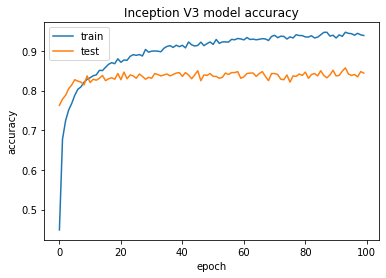

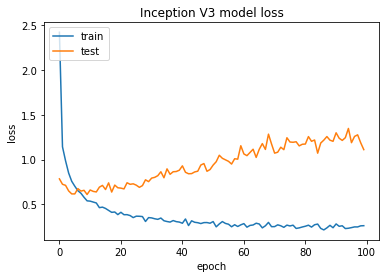

In [58]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Inception V3 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Inception V3 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

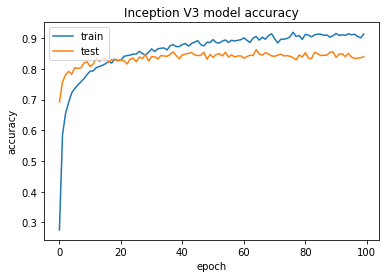

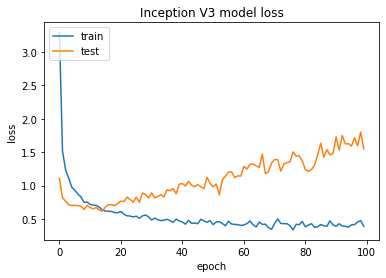

In [67]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Inception V3 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Inception V3 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

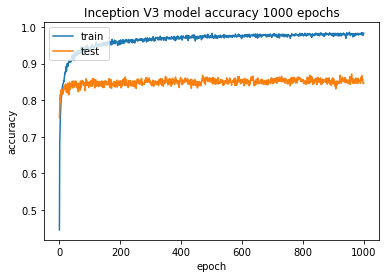

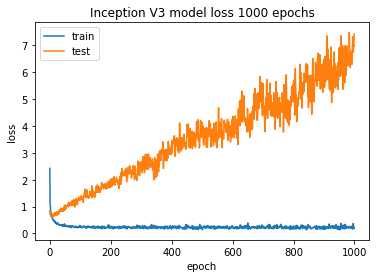

In [71]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Inception V3 model accuracy 1000 epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Inception V3 model loss 1000 epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        <your model's name>.summary()
   
__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 



In [45]:
### TODO: Define your architecture.
### TODO: Obtain bottleneck features from another pre-trained CNN.
bottleneck_features = np.load('bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

# Define sequential CNN and it's output layers
VGG16_model = Sequential()

VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
# VGG16_model.add(Flatten(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(512, activation='relu', use_bias=True,))
VGG16_model.add(Dropout(0.4))
VGG16_model.add(Dense(256, activation='relu', use_bias=True,))
VGG16_model.add(Dropout(0.3))
VGG16_model.add(Dense(133, activation='softmax'))

VGG16_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_7 ( (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 133)               34181     
Total params: 428,165
Trainable params: 428,165
Non-trainable params: 0
_______________________________________________

In [34]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen =ImageDataGenerator(
            rescale = 1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'dogImages/train',  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')  # since we use 

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'dogImages/valid',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

### TODO: Train the model.
epochs = 50

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.inception_augmentation.50epochs.hdf5', 
                               verbose=1, save_best_only=True)

history =  VGG16_model.fit(train_generator, 
                  validation_data=validation_generator,
                  epochs=epochs,  batch_size=1, callbacks=[checkpointer], verbose=1)

Found 6680 images belonging to 133 classes.
Found 835 images belonging to 133 classes.


### (IMPLEMENTATION) Compile the Model

In [35]:
### TODO: Compile the model.
VGG16_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.  

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [36]:
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.inception_Flatten_bias.200epochs.hdf5', 
                               verbose=1, save_best_only=True)

history =VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=10, batch_size=50, callbacks=[checkpointer], verbose=1)
 

Train on 6680 samples, validate on 835 samples
Epoch 1/10
6650/6680 [============================>.] - ETA: 0s - loss: 15.2406 - accuracy: 0.0155
Epoch 00001: val_loss improved from inf to 4.85577, saving model to saved_models/weights.best.inception_Flatten_bias.200epochs.hdf5
6680/6680 [==============================] - 33s 5ms/sample - loss: 15.1941 - accuracy: 0.0154 - val_loss: 4.8558 - val_accuracy: 0.0228
Epoch 2/10
6650/6680 [============================>.] - ETA: 0s - loss: 5.3286 - accuracy: 0.0227
Epoch 00002: val_loss did not improve from 4.85577
6680/6680 [==============================] - 30s 5ms/sample - loss: 5.3317 - accuracy: 0.0226 - val_loss: 4.9806 - val_accuracy: 0.0371
Epoch 3/10
6650/6680 [============================>.] - ETA: 0s - loss: 5.0879 - accuracy: 0.0256
Epoch 00003: val_loss improved from 4.85577 to 4.80170, saving model to saved_models/weights.best.inception_Flatten_bias.200epochs.hdf5
6680/6680 [==============================] - 28s 4ms/sample - loss

### (IMPLEMENTATION) Load the Model with the Best Validation Loss

In [19]:
### TODO: Load the model weights with the best validation loss.
# Load the model
VGG16_model.load_weights('saved_models/weights.best.inception_augmentation.50epochs.hdf5')

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Ensure that your test accuracy is greater than 60%.

In [48]:
### TODO: Calculate classification accuracy on the test dataset.
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy after 50 epochs: %.4f%%' % test_accuracy)

Test accuracy after 5 epochs: 74.0431%


In [46]:
### TODO: Calculate classification accuracy on the test dataset.

# Load the model
VGG16_model.load_weights('saved_models/weights.best.inception_augmentation.1000epochs.hdf5')

# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy after 1000 epochs: %.4f%%' % test_accuracy)

Test accuracy after 1000 epochs: 74.1627%


In [37]:
# Load the model
VGG16_model.load_weights('saved_models/weights.best.inception_Flatten_bias.200epochs.hdf5')

# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy after 66 epochs: %.4f%%' % test_accuracy)

Test accuracy after 66 epochs: 5.7416%


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan_hound`, etc) that is predicted by your model.  

Similar to the analogous function in Step 5, your function should have three steps:
1. Extract the bottleneck features corresponding to the chosen CNN model.
2. Supply the bottleneck features as input to the model to return the predicted vector.  Note that the argmax of this prediction vector gives the index of the predicted dog breed.
3. Use the `dog_names` array defined in Step 0 of this notebook to return the corresponding breed.

The functions to extract the bottleneck features can be found in `extract_bottleneck_features.py`, and they have been imported in an earlier code cell.  To obtain the bottleneck features corresponding to your chosen CNN architecture, you need to use the function

    extract_{network}
    
where `{network}`, in the above filename, should be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.

In [47]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from extract_bottleneck_features import *
    

def predict_dog_bread(img_path, network_name):
    # Bottleneck map
    user_network_map = {
        'VGG16': extract_VGG16,
        'VGG19':extract_VGG19,
        'Resnet50': extract_Resnet50,
        'Xception':extract_Xception,
        'InceptionV3':extract_InceptionV3
    }
    # extract bottleneck features
#     bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

In [48]:
img_path="dogImages/test/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00673.jpg"
predict_dog_bread(img_path,'VGG16')

'Anatolian_shepherd_dog'

In [49]:
img_path="dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg"
predict_dog_bread(img_path,'VGG16')

'Affenpinscher'

---
<a id='step6'></a>
## Step 6: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 5 to predict dog breed.  

A sample image and output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_2.png)

This photo looks like an Afghan Hound.
### (IMPLEMENTATION) Write your Algorithm

In [ ]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step7'></a>
## Step 7: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that __you__ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

In [ ]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.